In [114]:
from scipy.stats import trapz
import matplotlib.pyplot as plt
import numpy as np

In [115]:
%matplotlib inline

In [170]:
c, d = 0.1, 0.4
mean, var = trapz.stats(c, d, moments='mv')

Здесь мы записали параметры нашего трапецевидного распределения и получили его мат ожидание $\mu$ и дисперсию $\sigma$

In [171]:
r = trapz.rvs(c, d, size=1000)

Получили тысячу случайных велечин из распределения

In [172]:
x = np.linspace(trapz.ppf(0.001, c, d),
                trapz.ppf(0.999, c, d), 1000)


список координат $x$ для графиков

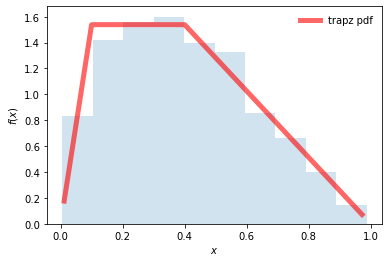

In [173]:
plt.hist(r, density=True, histtype='stepfilled', alpha=0.2, bins=10)
plt.plot(x, trapz.pdf(x, c, d),
       'r-', lw=5, alpha=0.6, label='trapz pdf')
plt.legend(loc='best', frameon=False)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.show()

Гистограмма по количеству значений из случайной выборки и график плотности вероятности

для n = 1: μ = 0.397; σ^2 = 0.224


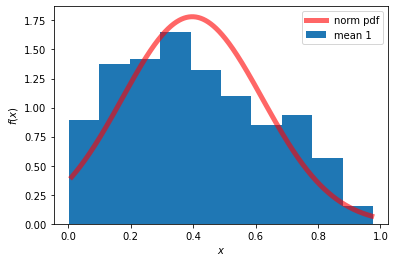

для n = 5: μ = 0.397; σ^2 = 0.100


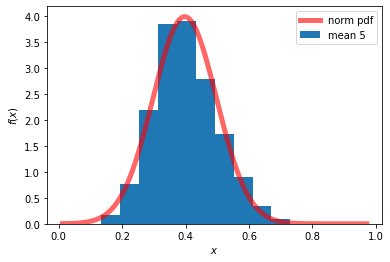

для n = 10: μ = 0.397; σ^2 = 0.071


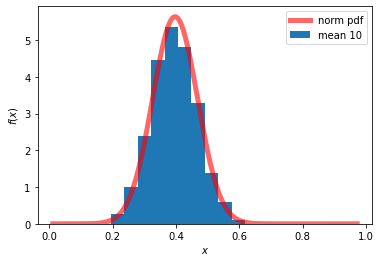

для n = 50: μ = 0.397; σ^2 = 0.032


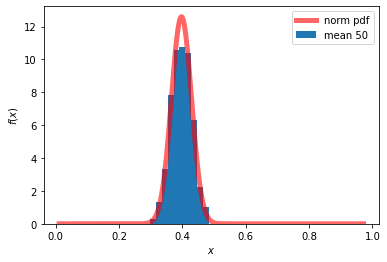

In [176]:
for n in (1, 5, 10, 50):
    means = np.zeros(1000, dtype=np.float)
    for i in range(1000):
        r = trapz.rvs(c, d, size=n)
        means[i] = r.mean()
    plt.hist(means, density=True, label=f"mean {n}")
    
    partial_var = (var/n) ** .5
    plt.plot(x, norm.pdf(x, mean, partial_var),
       'r-', lw=5, alpha=0.6, label='norm pdf')
    print(f"для n = {n}: μ = {mean:.3f}; σ^2 = {partial_var:.3f}")
    
    plt.legend()
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    plt.show()

Здесь мы построили гистограммы распределения средних из случайных велечин из выборок по 1, 5, 10, и 50; и график, к которому они стремятся согласно **Цернтральной Предельной Теореме**.

Как мы видим, с увеличением числа выборок, распределение средних случайных чисел по ним всё больше похоже на **нормальное распределение**.